# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# 2. The Data

In [2]:
# Reading the Iris.csv file
data = load_iris()

# Extracting Attributes / Features
X = data.data

# Extracting Target / Class Labels
y = data.target

# 3. The Model

In [15]:

#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Now we have create a Decision tree classifier and trained it with training dataset.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

DecisionTreeClassifier()

## The Logic

[Text(0.375, 0.9285714285714286, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(0.25, 0.7857142857142857, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'X[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(0.25, 0.6428571428571429, 'X[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.6428571428571429, 'X[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(0.625, 0.5, 'X[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.75, 0.35714285714285715, 'X[2] <= 4.9\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.625, 0.21428571428571427, 'X[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsampl

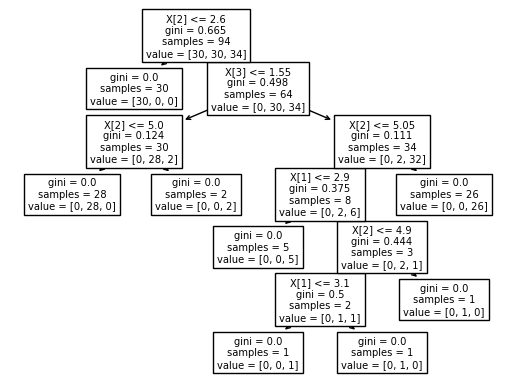

In [16]:
#Visualized the Tree which is formed on train dataset

tree.plot_tree(Iris_clf)

In [29]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
print(features)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [33]:
clf = Iris_clf

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if {feature_name}(X[:, {feature}]) <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature_name = features[feature[i]],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if PetalLengthCm(X[:, 2]) <= 2.599999964237213 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if PetalWidthCm(X[:, 3]) <= 1.550000011920929 else to node 6.
		node=3 is a split node: go to node 4 if PetalLengthCm(X[:, 2]) <= 5.0 else to node 5.
			node=4 is a leaf node.
			node=5 is a leaf node.
		node=6 is a split node: go to node 7 if PetalLengthCm(X[:, 2]) <= 5.049999952316284 else to node 14.
			node=7 is a split node: go to node 8 if SepalWidthCm(X[:, 1]) <= 2.899999976158142 else to node 9.
				node=8 is a leaf node.
				node=9 is a split node: go to node 10 if PetalLengthCm(X[:, 2]) <= 4.900000095367432 else to node 13.
					node=10 is a split node: go to node 11 if SepalWidthCm(X[:, 1]) <= 3.100000023841858 else to node 12.
						node=11 is a leaf node.
						node=12 is a leaf node.
					node=13 is a leaf node.
			node=14 is a leaf nod

# 4. The  Scores

In [34]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat)*100,"%")
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 81.81818181818183 %


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [23]:
l = list(Iris_clf.tree_.apply(Xcv.astype("float32")))

In [24]:
 dict((x,l.count(x)) for x in set(l))

{1: 1, 4: 7, 14: 3}

## 4.2 Scores on Test Set

In [27]:
#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)